In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline  
#自动show plot
import scipy.optimize as opt
from sklearn.linear_model import LinearRegression

## ES

In [2]:
es=pd.read_csv("ES-1min.asc")

In [3]:
es.head()

,Date,Time,Open,High,Low,Close,Volume
0,09/10/97,08:31,1101.75,1102.00,1101.75,1102.00,0
1,09/10/97,08:32,1101.75,1101.75,1101.50,1101.75,0
2,09/10/97,08:33,1101.50,1101.75,1101.25,1101.50,0
3,09/10/97,08:34,1101.75,1102.25,1101.75,1102.00,0
4,09/10/97,08:35,1102.00,1102.00,1101.25,1101.25,0


In [4]:
close=es['Close']
time=es.loc[:,['Time']]

In [5]:
close0=close.iloc[0]

In [6]:
close0

1102.0

In [7]:
tao=np.arange(10001)[1:]
tao[1]
# tao[1]

2

In [8]:
np.arange(len(close))

array([      0,       1,       2, ..., 2190642, 2190643, 2190644])

In [9]:
r=[]

In [10]:
def diff_tao(df,tao1):
    r=(df.shift(-tao1)/df)-1
    r=r.dropna()
    return(np.var(r)**(1/2))


In [12]:
sigma=np.zeros(10000)

for i in np.arange(10000):
    sigma[i]=diff_tao(df=close,tao1=tao[i])
    if i%500 == 0:
        print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


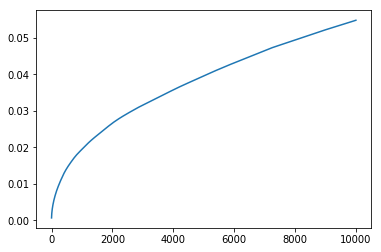

In [13]:
plt.plot(sigma, '-')

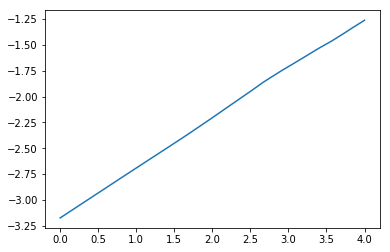

In [15]:
tau = range(1,10001)
plt.plot(np.log10(tau), np.log10(sigma))

In [27]:
lm = LinearRegression()
lm1 = LinearRegression()


In [28]:
lm.fit(np.array(tau).reshape(-1,1),sigma)
lm1.fit(np.log10(np.array(tau)).reshape(-1,1), np.log10(sigma))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:

c = lm.predict(np.array(tau).reshape(-1,1))
c1 = lm1.predict(np.log10(np.array(tau)).reshape(-1,1))

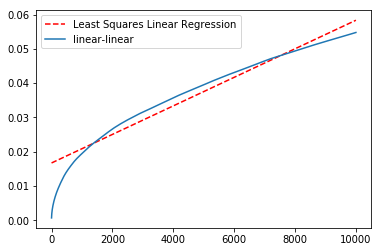

In [31]:

plt.plot(tau, c,'--', color='r', label="Least Squares Linear Regression")
plt.plot(tau, sigma, label="linear-linear")
plt.legend(loc='best');

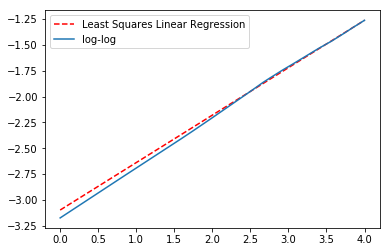

In [32]:
plt.plot(np.log10(tau), c1,'--', color='r', label="Least Squares Linear Regression")
plt.plot(np.log10(tau), np.log10(sigma), label="log-log")
plt.legend(loc='best');

In [33]:
lm.score(np.array(tau).reshape(-1,1),sigma)

0.9521501039580892

In [34]:
lm.intercept_ , lm.coef_

(0.01670247603267721, array([4.1657446e-06]))

In [35]:
mse = np.mean((c - sigma)**2)
mse

7.267409113919045e-06

In [36]:
lm1.intercept_, lm1.coef_

(-3.0988457091982218, array([0.45945615]))

In [37]:
mse1 = np.mean((c1-np.log10(sigma))**2)
mse1

3.972567830630244e-05

In [18]:
df=pd.read_csv("FT-1min.asc")

In [19]:
close1=df['Close']
time=df.loc[:,['Time']]

In [20]:
close0=close.iloc[0]

In [21]:
tao=np.arange(10001)[1:]
tao[1]
# tao[1]

2

In [26]:
sigma1=np.zeros(10000)

# sigma1 = list(map(diff_tao, close1, list(tao)))

for i in np.arange(10000):
    sigma1[i]=diff_tao(df=close1,tao1=tao[i])
    if i%500 == 0:
        print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


In [38]:
lm = LinearRegression()
lm1 = LinearRegression()

In [39]:
lm.fit(np.array(tau).reshape(-1,1),sigma1)
lm1.fit(np.log10(np.array(tau)).reshape(-1,1), np.log10(sigma1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
c = lm.predict(np.array(tau).reshape(-1,1))
c1 = lm1.predict(np.log10(np.array(tau)).reshape(-1,1))

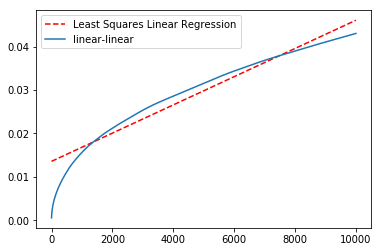

In [41]:

plt.plot(tau, c,'--', color='r', label="Least Squares Linear Regression")
plt.plot(tau, sigma1, label="linear-linear")
plt.legend(loc='best');

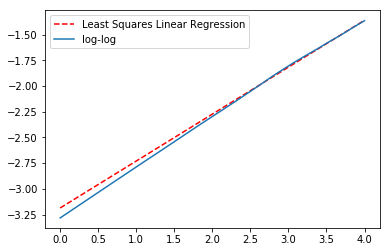

In [42]:
plt.plot(np.log10(tau), c1,'--', color='r', label="Least Squares Linear Regression")
plt.plot(np.log10(tau), np.log10(sigma1), label="log-log")
plt.legend(loc='best');

In [43]:
lm.score(np.array(tau).reshape(-1,1),sigma1)

0.9448408267182232

In [44]:
lm.intercept_ , lm.coef_

(0.013572556657584889, array([3.25490264e-06]))

In [45]:
mse = np.mean((c - sigma1)**2)
mse

5.154112017463089e-06

In [46]:
lm1.intercept_, lm1.coef_

(-3.186029029354794, array([0.45617716]))

In [47]:
mse1 = np.mean((c1-np.log10(sigma1))**2)
mse1

4.412442429416386e-05